In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

#plt.style.available

# Load data :

### JAFFE

In [6]:
jaffe_X = pd.read_csv("jaffeX.csv",delimiter=";")
jaffe_y = pd.read_csv("jaffeY.csv",delimiter=";")

In [7]:
jaffe_y = pd.get_dummies(jaffe_y.values.reshape([jaffe_y.shape[1]])).values +0.
jaffe_X = jaffe_X.values/255

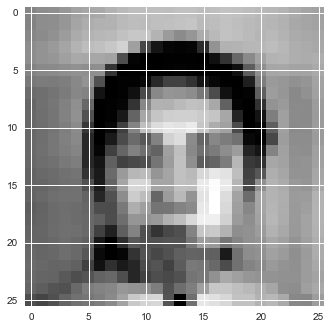

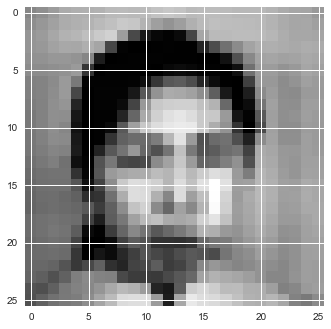

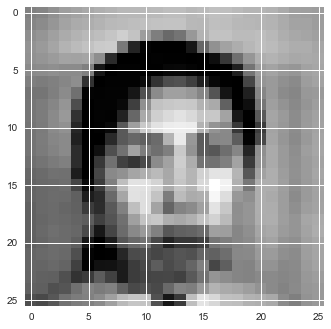

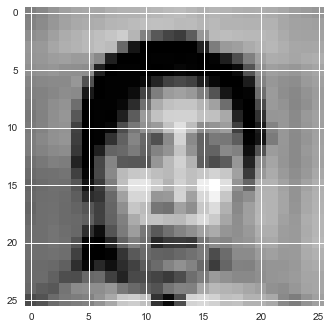

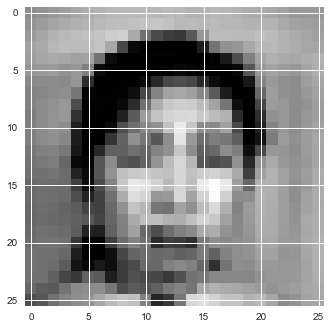

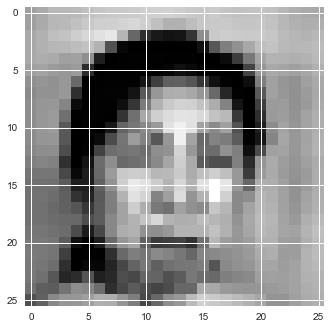

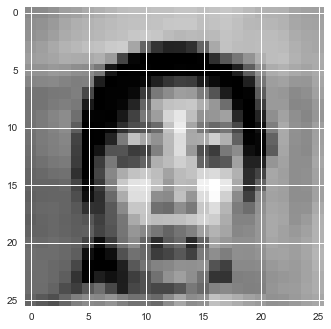

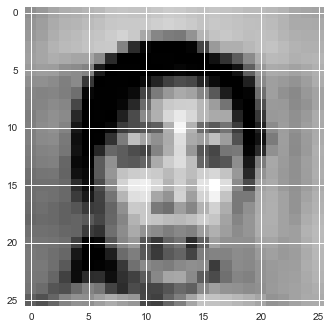

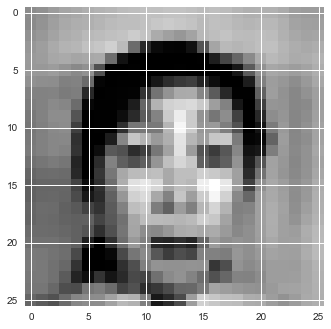

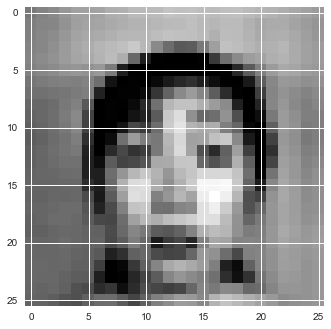

In [8]:
# Affichage d'un exemple d'image

for i in range(10):

    img = jaffe_X[i].reshape([26,26])
    plt.imshow(img.transpose(),cmap="gray")
    plt.show()

In [9]:
# RANDOM SPLIT JAFFE DATASET

X_train, X_test, y_train, y_test = train_test_split( jaffe_X, jaffe_y, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

Number of samples in training set :  159
Number of samples in test set :  54


In [10]:
currentdata = "Jaffe"
dim = 26
shape = X_train.shape[1]

### MNIST

In [ ]:
#currentdata = "mnist"

#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

In [ ]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

In [ ]:
train_labels = pd.get_dummies(train_labels.reshape(len(train_labels))).values +0.
eval_labels = pd.get_dummies(eval_labels.reshape(len(eval_labels))).values +0.

In [ ]:
# RANDOM SPLIT MNIST DATASET

X_train, X_test, y_train, y_test = train_test_split( train_data, train_labels, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

In [ ]:
currentdata = "MNIST"
dim = 28

shape = X_train.shape[1]

# Neural network with Random initialisation

In [11]:
# CREATION DU RESEAU DE NEURONE

#sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, shape])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

# NORMAL DISTRIBUTION
#initializer = tf.random_normal_initializer()

# ZEROS INITIALIZER
#initializer = tf.zeros


W1 = tf.Variable(initializer([shape,100]))
b1 = tf.Variable(initializer([100]))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

W2 = tf.Variable(initializer([100,50]))
b2 = tf.Variable(initializer([50]))

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

W3 = tf.Variable(initializer([50,10]))
b3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))



LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [ ]:
# TRAINING : 

acs = []
ls = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs.append(ac)
    ls.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=", ")
        print("accuracy : " , ac, end=", ")
        print("loss : ",l , end=", ")
        
plt.plot(acs)
plt.show()

plt.plot(ls)
plt.show()

In [13]:
init1 = tf.contrib.layers.xavier_initializer()
init2 = tf.random_normal_initializer()
init3 = tf.zeros
inits = [init1, init2, init3]

acsList = []
lsList = []
initsS = ["xavier", "distribution normal", "zéro"]

for initializer, title in zip(inits, initsS):

    print(title)
    
    try:
        sess.close()
    except NameError:
        sess = None
    # CREATION DU RESEAU DE NEURONE
    sess = tf.Session()

    x = tf.placeholder(tf.float32, shape=[None, shape])

    # XAVIER INITIALIZER
    #initializer =  tf.contrib.layers.xavier_initializer()

    # NORMAL DISTRIBUTION
    #initializer = tf.random_normal_initializer()

    # ZEROS INITIALIZER
    #initializer = tf.zeros

    W1 = tf.Variable(initializer([shape,100]))
    b1 = tf.Variable(initializer([100]))

    y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

    W2 = tf.Variable(initializer([100,50]))
    b2 = tf.Variable(initializer([50]))

    y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

    W3 = tf.Variable(initializer([50,10]))
    b3 = tf.Variable(initializer([10]))

    y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

    y_ = tf.placeholder(tf.float32, shape=[None, 10])

    cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))

    LEARNING_RATE = 0.1

    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    sess.run(tf.global_variables_initializer())


    # TRAINING : 

    acs = []
    ls = []

    number_of_epoch = 1000

    for i in range(number_of_epoch):
        ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
        l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
        sess.run(training,feed_dict={x : X_train, y_ : y_train})
        acs.append(ac)
        ls.append(l)
        if(i%10 == 0):
            print("epoch : ", i, "/", number_of_epoch, end=", ")
            print("accuracy : " , ac, end=", ")
            print("loss : ",l )
    acsList.append(acs)
    lsList.append(ls)

xavier
epoch :  0 / 1000, accuracy :  0.11111111, loss :  3.417227
epoch :  10 / 1000, accuracy :  0.074074075, loss :  3.2294796
epoch :  20 / 1000, accuracy :  0.09259259, loss :  3.2200658
epoch :  30 / 1000, accuracy :  0.12962963, loss :  3.2115793
epoch :  40 / 1000, accuracy :  0.14814815, loss :  3.2028193
epoch :  50 / 1000, accuracy :  0.14814815, loss :  3.1936443
epoch :  60 / 1000, accuracy :  0.16666667, loss :  3.1839283
epoch :  70 / 1000, accuracy :  0.25925925, loss :  3.173541
epoch :  80 / 1000, accuracy :  0.2777778, loss :  3.1623511
epoch :  90 / 1000, accuracy :  0.2962963, loss :  3.1502202
epoch :  100 / 1000, accuracy :  0.2962963, loss :  3.136993
epoch :  110 / 1000, accuracy :  0.2777778, loss :  3.1224823
epoch :  120 / 1000, accuracy :  0.2777778, loss :  3.1064665
epoch :  130 / 1000, accuracy :  0.2777778, loss :  3.0886922
epoch :  140 / 1000, accuracy :  0.2777778, loss :  3.0688818
epoch :  150 / 1000, accuracy :  0.2777778, loss :  3.0467427
epoch 

epoch :  390 / 1000, accuracy :  0.9814815, loss :  0.100529715
epoch :  400 / 1000, accuracy :  0.9814815, loss :  0.09720954
epoch :  410 / 1000, accuracy :  0.9814815, loss :  0.09407132
epoch :  420 / 1000, accuracy :  0.9814815, loss :  0.09109938
epoch :  430 / 1000, accuracy :  0.9814815, loss :  0.08827955
epoch :  440 / 1000, accuracy :  0.9814815, loss :  0.08559948
epoch :  450 / 1000, accuracy :  0.9814815, loss :  0.08304775
epoch :  460 / 1000, accuracy :  0.9814815, loss :  0.08061425
epoch :  470 / 1000, accuracy :  0.9814815, loss :  0.07829003
epoch :  480 / 1000, accuracy :  0.9814815, loss :  0.07606714
epoch :  490 / 1000, accuracy :  0.9814815, loss :  0.073938556
epoch :  500 / 1000, accuracy :  0.9814815, loss :  0.071898125
epoch :  510 / 1000, accuracy :  0.9814815, loss :  0.06994071
epoch :  520 / 1000, accuracy :  0.9814815, loss :  0.068061806
epoch :  530 / 1000, accuracy :  0.9814815, loss :  0.06625777
epoch :  540 / 1000, accuracy :  0.9814815, loss : 

epoch :  690 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  700 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  710 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  720 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  730 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  740 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  750 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  760 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  770 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  780 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  790 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  800 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  810 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  820 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  830 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  840 / 1000, accuracy :  0.07407

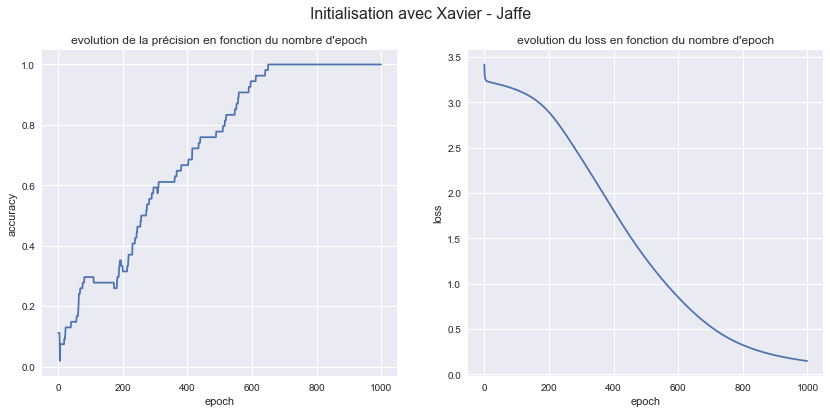

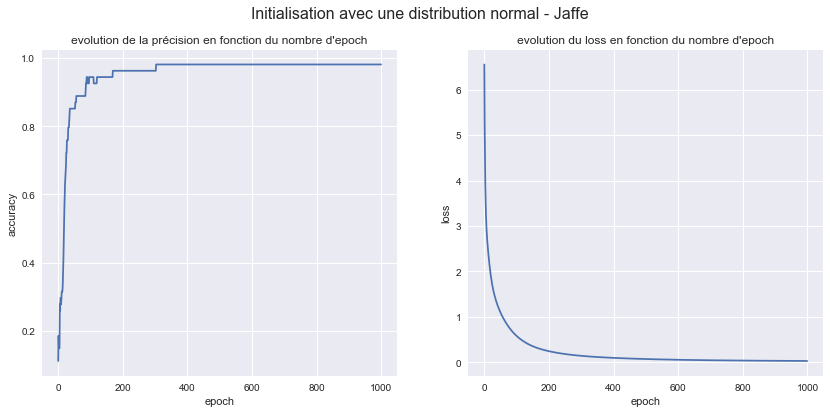

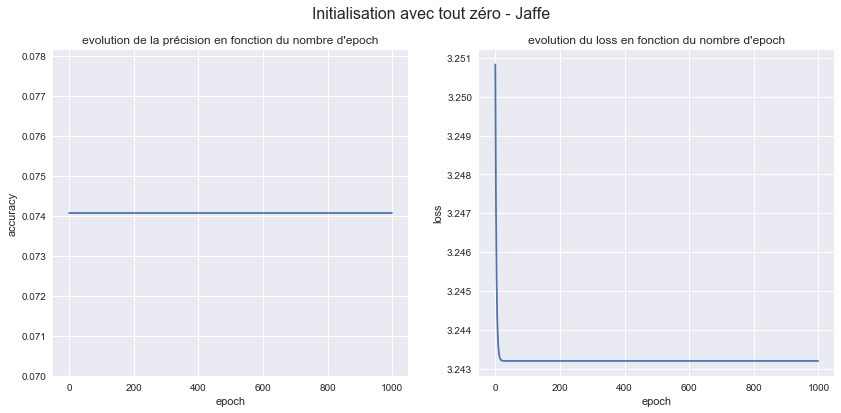

In [14]:
titles = ["Initialisation avec Xavier - "+currentdata,
          "Initialisation avec une distribution normal - "+currentdata,
          "Initialisation avec tout zéro - "+currentdata]

for acs, ls, title in zip(acsList, lsList, titles):
    plt.figure(figsize=(14, 6))

    ax = plt.subplot(121)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()

    plt.plot(acs)

    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("evolution de la précision en fonction du nombre d'epoch")

    ax = plt.subplot(122)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()

    plt.plot(ls)

    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("evolution du loss en fonction du nombre d'epoch")

    plt.suptitle(title, size=16)

    #plt.tight_layout()
    #plt.show()
    plt.savefig("plot/"+title+".png")
    

In [15]:
sess.close()

# AUTO ENCODER

In [16]:
sess = tf.Session()

learning_rate = 0.01

initializer = tf.contrib.layers.xavier_initializer()


X = tf.placeholder(tf.float32, shape=[None, shape])

# encoder layers : 

w1 = tf.Variable(initializer([shape, 100]))
b1 = tf.Variable(initializer([100]))

layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, w1),b1))

w2 = tf.Variable(initializer([100, 50]))
b2 = tf.Variable(initializer([50]))

layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2),b2))

# decoder layers : 

w3 = tf.Variable(initializer([50, 100]))
b3 = tf.Variable(initializer([100]))

layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, w3),b3))

w4 = tf.Variable(initializer([100, shape]))
b4 = tf.Variable(initializer([shape]))

y_pred = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, w4),b4))

y_true = X

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

loss :  0.06143965
loss :  0.06137944
loss :  0.06127768
loss :  0.061105914
loss :  0.060816646
loss :  0.060331356
loss :  0.059522517
loss :  0.058189124
loss :  0.056031205
loss :  0.052645225
loss :  0.04759948
loss :  0.040702652
loss :  0.032572668
loss :  0.025198637
loss :  0.020917423
loss :  0.019544661
loss :  0.019222593
loss :  0.019127911
loss :  0.01909413
loss :  0.01907888
loss :  0.019067146
loss :  0.019052615
loss :  0.019130882
loss :  0.020235103
loss :  0.019756243
loss :  0.019382708
loss :  0.018769896
loss :  0.017957611
loss :  0.017092386
loss :  0.021444203
loss :  0.01473228
loss :  0.014651277
loss :  0.013356479
loss :  0.012180971
loss :  0.012411566
loss :  0.012541267
loss :  0.0120406095
loss :  0.011327254
loss :  0.011323755
loss :  0.010798957
loss :  0.01075109
loss :  0.010085546
loss :  0.011222287
loss :  0.010260091
loss :  0.009460394
loss :  0.013121499
loss :  0.0092389835
loss :  0.0078406045
loss :  0.0072258795
loss :  0.009467116
loss

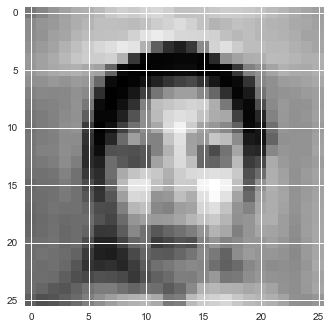

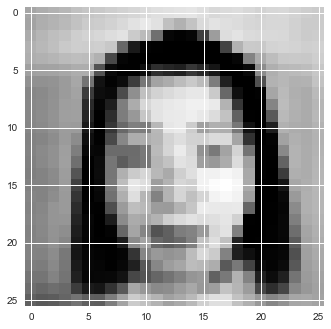

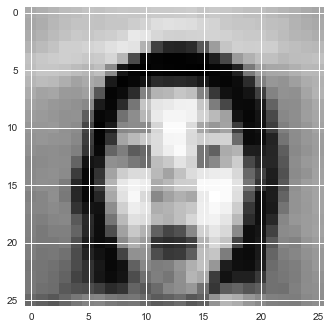

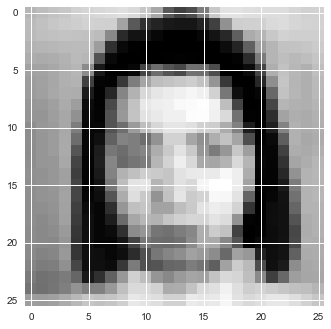

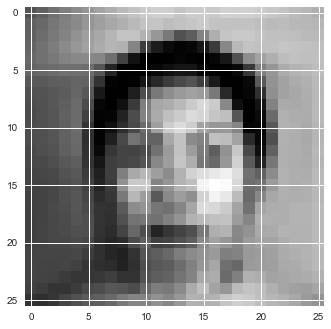

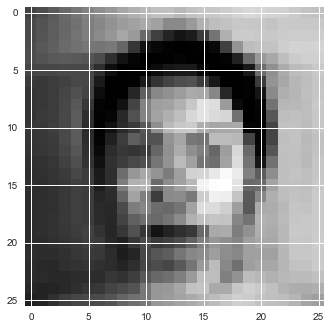

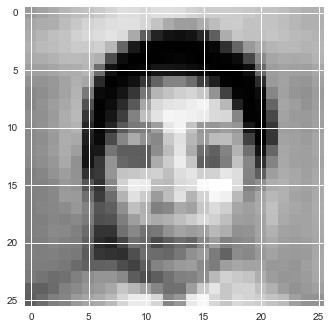

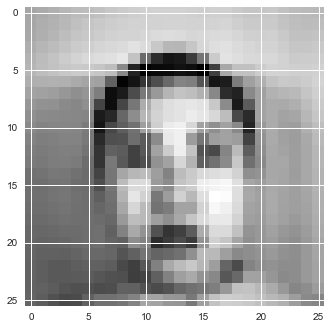

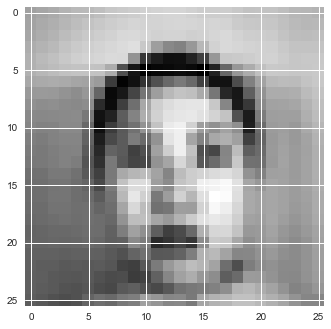

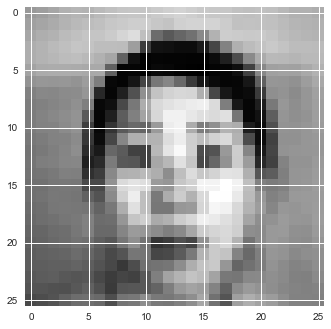

In [17]:
for i in range(1000):

    sess.run(optimizer,feed_dict={X : X_train})
    l = sess.run(loss,feed_dict={X : X_train} )
    if i % 10 == 0 : 
        print("loss : ", l)

img_reconstructed = sess.run(y_pred, feed_dict={X : X_test})

# SHOW 10 reconstructed images :

for i in range(10):
    image = img_reconstructed[i].reshape([dim,dim])
    plt.imshow(image.transpose(),cmap = "gray")
    plt.show()

## Training with autoencoder initialisation

In [18]:
# CREATION DU RESEAU DE NEURONE
sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, shape])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

W1 = w1
B1 = b1

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),B1))

W2 = w2
B2 = b2

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),B2))

W3 = tf.Variable(initializer([50,10]))
B3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),B3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))


LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [19]:
# TRAINING : 

acs_AE = []
ls_AE = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs_AE.append(ac)
    ls_AE.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=", ")
        print("accuracy : " , ac, end=", ")
        print("loss : ",l )


epoch :  0 / 1000, accuracy :  0.074074075, loss :  3.5425591
epoch :  10 / 1000, accuracy :  0.074074075, loss :  3.2532609
epoch :  20 / 1000, accuracy :  0.12962963, loss :  3.2338529
epoch :  30 / 1000, accuracy :  0.09259259, loss :  3.2267714
epoch :  40 / 1000, accuracy :  0.09259259, loss :  3.219656
epoch :  50 / 1000, accuracy :  0.11111111, loss :  3.212201
epoch :  60 / 1000, accuracy :  0.14814815, loss :  3.2043102
epoch :  70 / 1000, accuracy :  0.14814815, loss :  3.1958885
epoch :  80 / 1000, accuracy :  0.14814815, loss :  3.1868382
epoch :  90 / 1000, accuracy :  0.14814815, loss :  3.1770577
epoch :  100 / 1000, accuracy :  0.14814815, loss :  3.1664364
epoch :  110 / 1000, accuracy :  0.14814815, loss :  3.1548512
epoch :  120 / 1000, accuracy :  0.14814815, loss :  3.142162
epoch :  130 / 1000, accuracy :  0.16666667, loss :  3.1282067
epoch :  140 / 1000, accuracy :  0.18518518, loss :  3.112797
epoch :  150 / 1000, accuracy :  0.2777778, loss :  3.0957134
epoch 

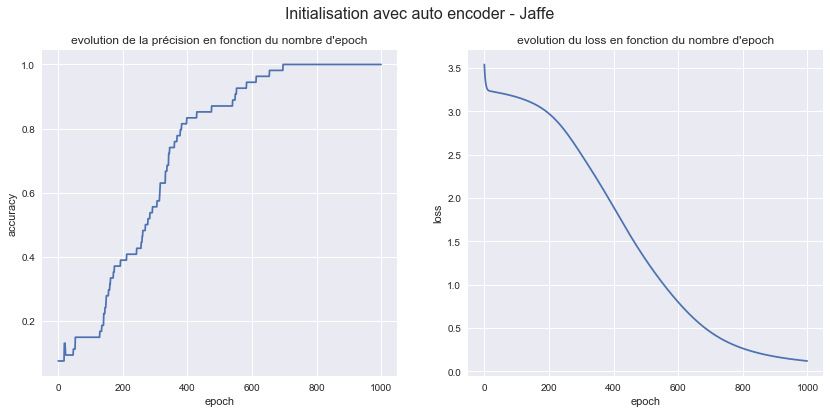

In [20]:
title = "Initialisation avec auto encoder - "+currentdata

plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(acs_AE)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(ls_AE)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")

plt.suptitle(title, size=16)

#plt.tight_layout()
#plt.show()
plt.savefig("plot/"+title+".png")

In [21]:
sess.close()

# PCA initialisation : 

In [23]:
# fir

data = X_train.copy()

m = data.mean(axis = 0 )
#data -= data.mean(axis = 0 )
cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
R = evecs[:,idx]
inertia = evals[idx]

Rm =np.dot(m,R)
respca = np.dot(data, R) - Rm

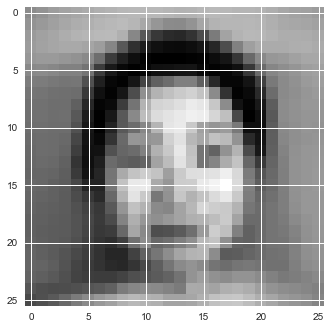

In [24]:
plt.imshow(np.dot(respca,np.linalg.inv(R) + m )[100].reshape([dim,dim]).T,cmap = "gray")
plt.show()

In [25]:
# Second PCA

data = respca.copy()
m2 = data.mean(axis = 0 )

cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
R2 = evecs[:,idx]
inertia = evals[idx]

Rm2 =np.dot(m,R)
respca = np.dot(data, R) - Rm2

reconstructed = np.linalg.inv(R) + m2

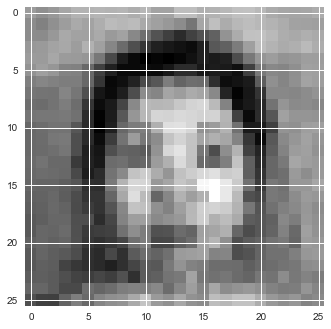

In [26]:
one = (np.dot(np.linalg.inv(R2),reconstructed) + m)[126].reshape([dim,dim])
plt.imshow(one.T,cmap ="gray")
plt.show()

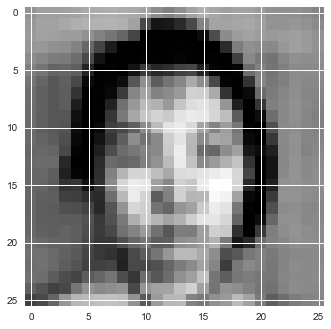

In [27]:
plt.imshow(X_train[25].reshape([dim,dim]).T,cmap= "gray")
plt.show()

In [28]:
# CONVERT TO FLOAT32

R = np.array(R,dtype="float32")[:,:100]
R2 = np.array(R2,dtype="float32")[:100,:50]
Rm = np.array(Rm,dtype="float32")[:100]
Rm2 = np.array(Rm2,dtype="float32")[:50]


In [29]:
R.shape

(676, 100)

## INITIALISATION WITH PCA

In [30]:
# CREATION DU RESEAU DE NEURONE
sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, shape])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

W1 = tf.Variable(R)
B1 = tf.Variable((-Rm))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),B1))

W2 = tf.Variable(R2)
B2 = tf.Variable(-Rm2)

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),B2))

W3 = tf.Variable(initializer([50,10]))
B3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),B3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))


LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [31]:
# TRAINING : 

acs_PCA = []
ls_PCA = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs_PCA.append(ac)
    ls_PCA.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=', ')
        print("accuracy : " , ac, end=', ')
        print("loss : ",l )


epoch :  0 / 1000, accuracy :  0.074074075, loss :  3.3874166
epoch :  10 / 1000, accuracy :  0.074074075, loss :  3.2387512
epoch :  20 / 1000, accuracy :  0.074074075, loss :  3.2307625
epoch :  30 / 1000, accuracy :  0.074074075, loss :  3.2233737
epoch :  40 / 1000, accuracy :  0.09259259, loss :  3.2159724
epoch :  50 / 1000, accuracy :  0.12962963, loss :  3.20851
epoch :  60 / 1000, accuracy :  0.12962963, loss :  3.2009363
epoch :  70 / 1000, accuracy :  0.14814815, loss :  3.1931958
epoch :  80 / 1000, accuracy :  0.16666667, loss :  3.1852276
epoch :  90 / 1000, accuracy :  0.18518518, loss :  3.1769667
epoch :  100 / 1000, accuracy :  0.22222222, loss :  3.1683443
epoch :  110 / 1000, accuracy :  0.24074075, loss :  3.159286
epoch :  120 / 1000, accuracy :  0.25925925, loss :  3.1497135
epoch :  130 / 1000, accuracy :  0.2777778, loss :  3.1395416
epoch :  140 / 1000, accuracy :  0.2962963, loss :  3.128679
epoch :  150 / 1000, accuracy :  0.2962963, loss :  3.1170244
epoch 

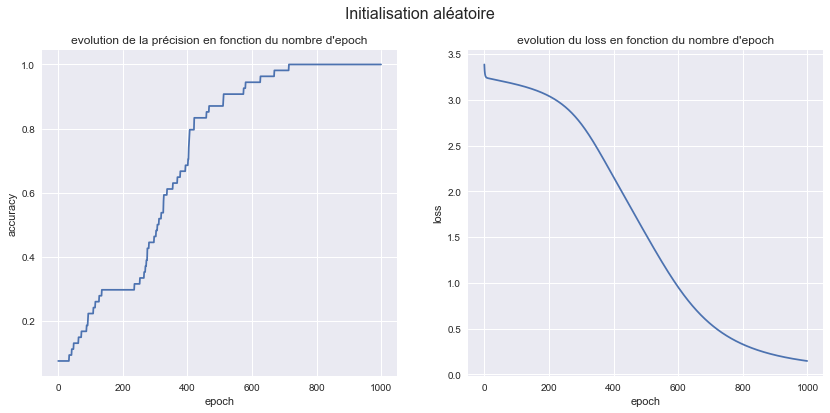

In [32]:
title = "Initialisation avec PCA - "+currentdata

plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(acs_PCA)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(ls_PCA)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")

plt.suptitle("Initialisation aléatoire", size=16)

#plt.tight_layout()
#plt.show()
plt.savefig("plot/"+title+".png")


In [33]:
sess.close()

# plot poster

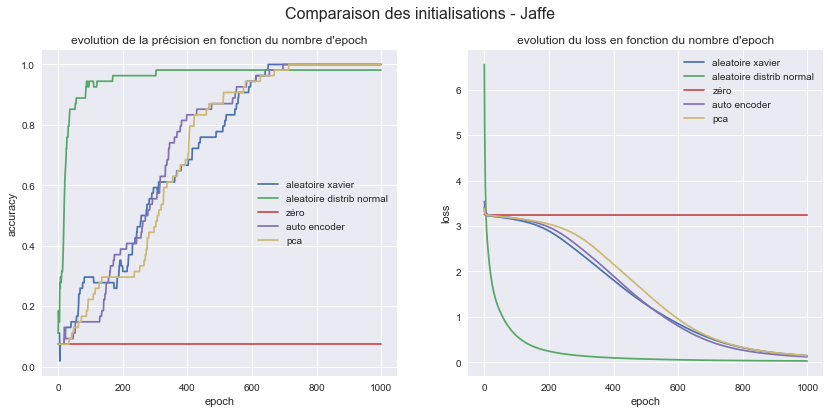

In [34]:
title = "Comparaison des initialisations - "+currentdata

plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()



plt.plot(acsList[0], label="aleatoire xavier")
plt.plot(acsList[1], label="aleatoire distrib normal")
plt.plot(acsList[2], label="zéro")
plt.plot(acs_AE, label="auto encoder")
plt.plot(acs_PCA, label="pca")

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")
plt.legend()


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(lsList[0], label="aleatoire xavier")
plt.plot(lsList[1], label="aleatoire distrib normal")
plt.plot(lsList[2], label="zéro")
plt.plot(ls_AE, label="auto encoder")
plt.plot(ls_PCA, label="pca")

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")
plt.legend()

plt.suptitle(title, size=16)

#plt.tight_layout()
#plt.show()
plt.savefig("plot/"+title+".png")
